<a href="https://colab.research.google.com/github/Fumanguyen/EDA-Python-B2B-Marketing/blob/master/Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import datetime as dt

# Import Data

In [0]:
#Upload data
from google.colab import files
uploaded = files.upload()

Saving MQL.csv to MQL.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Closed Deal.csv to Closed Deal.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving olist_orders_dataset.csv to olist_orders_dataset.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving product_category_name_translation.csv to product_category_name_translation.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving olist_products_dataset.csv to olist_products_dataset.csv


In [0]:
#Import the MQL data
mql = pd.read_csv("MQL.csv")
close = pd.read_csv("Closed Deal.csv")
#ecommerce data
order_item = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
category = pd.read_csv("product_category_name_translation.csv")

#merge the two tables
data = pd.merge(mql, close, how = "left", on = "mql_id")
data['lost'] = data['won_date'].isnull()

In [0]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Exploratory Data Analysis

Text(0.5, 1.0, 'Number of MQL')

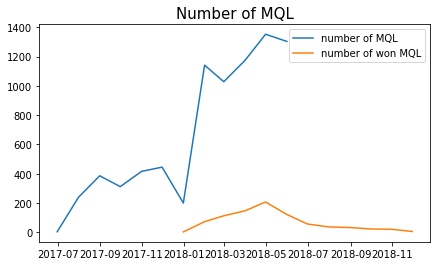

In [0]:
num_mql = mql.set_index(pd.to_datetime(mql['first_contact_date']))
num_mql = num_mql.groupby(pd.Grouper(freq = "M")).count().drop(axis =1, columns = ['first_contact_date',"landing_page_id", "origin"])
num_won = close.set_index(pd.to_datetime(close["won_date"]))
num_won = num_won.groupby(pd.Grouper(freq = "M")).count().drop(axis = 1, columns = ["seller_id", "sdr_id", "sr_id","business_segment", "lead_type", "lead_behaviour_profile", "has_company", "has_gtin", "average_stock", "business_type","declared_product_catalog_size",
 "declared_monthly_revenue", "won_date"])
plt.figure(figsize = (7,4))
plt.plot(num_mql.index, num_mql, "-", label = "number of MQL")
plt.plot(num_won.index, num_won, "-", label = "number of won MQL")
plt.legend()
plt.title("Number of MQL", size = 15)

## Origin

Text(0.5, 1.0, 'Number of MQL by channels')

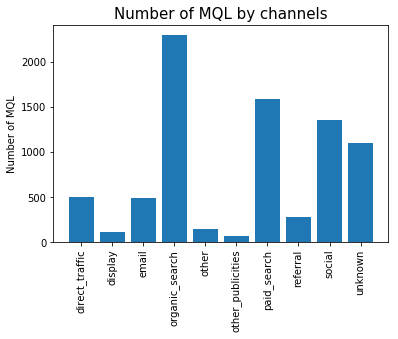

In [0]:
mql_origin = mql.groupby('origin').agg({'mql_id':"count"})
origin = list(mql_origin.index)

#Number of MQL by channels
plt.figure(figsize = (6,4))
plt.bar(mql_origin.index, mql_origin['mql_id'])
plt.xticks(rotation = 90)
plt.ylabel('Number of MQL')
plt.title("Number of MQL by channels", size =15)

Text(0.5, 1.0, 'Number of MQL by channels overtime')

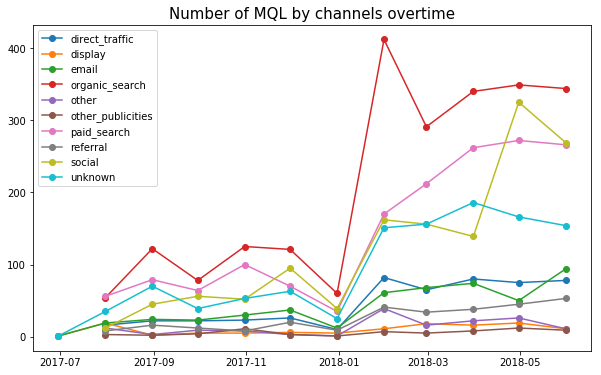

In [0]:
#Time: the number of MQL overtime by channel:
plt.figure(figsize = (10,6))
fancy_plot = plt.subplot()
#plot_dual = plot.twinx()
for i in origin:
    channel = mql[mql['origin'] == i]
    channel = channel.set_index(pd.to_datetime(channel['first_contact_date']))
    channel_agg = channel.groupby(pd.Grouper(freq = "M")).count().drop(axis = 1, columns =["first_contact_date", 
                                                                                           "landing_page_id", "origin"])
    fancy_plot.plot(channel_agg.index, channel_agg, "-o", label = i)
fancy_plot.legend()
plt.title('Number of MQL by channels overtime', size = 15)

Text(0.5, 1.0, 'Won rate by channel')

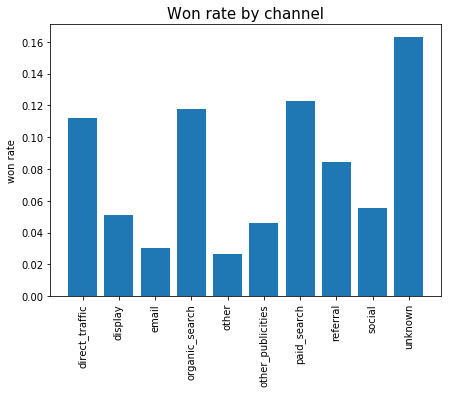

In [0]:
#Opportunity won rate by channel
data_origin = data[["origin","lost", 'mql_id']]
origin_lost = data_origin.groupby(['origin', 'lost']).count()

percentage = []
for i in origin:
    pct = origin_lost.loc[i].loc[False][0]/(origin_lost.loc[i].loc[True][0]+origin_lost.loc[i].loc[False][0])
    percentage.append(pct)

plt.figure(figsize = (7,5))
plt.bar(origin, percentage)
plt.xticks(rotation = 90)
plt.ylabel('won rate')
plt.title("Won rate by channel", size = 15)

## Landing Page

In [0]:
mql_lp = mql.groupby('landing_page_id').agg({'mql_id':"count"})
mql_lp = mql_lp[mql_lp['mql_id'] > 30]
data_lp = pd.merge(data, mql_lp, how = "inner", left_on = "landing_page_id", right_index = True)
#ata_lp = data_lp[data_lp['lost']] 
lp_lost = data_lp.groupby(['landing_page_id', 'lost']).agg({'mql_id_x':"count"})
landing_page = list(mql_lp.index)

percentage_lp = []
landing_page_2 = []
Num_mql = []
for i in landing_page:
    if mql_lp.loc[i][0] == lp_lost.loc[i].loc[True][0]:
        lp_lost.drop([i])
    else:
        pct = lp_lost.loc[i].loc[False][0]/(lp_lost.loc[i].loc[True][0]+lp_lost.loc[i].loc[False][0])
        percentage_lp.append(pct)
        landing_page_2.append(i)
        Num_mql.append(mql_lp.loc[i][0])

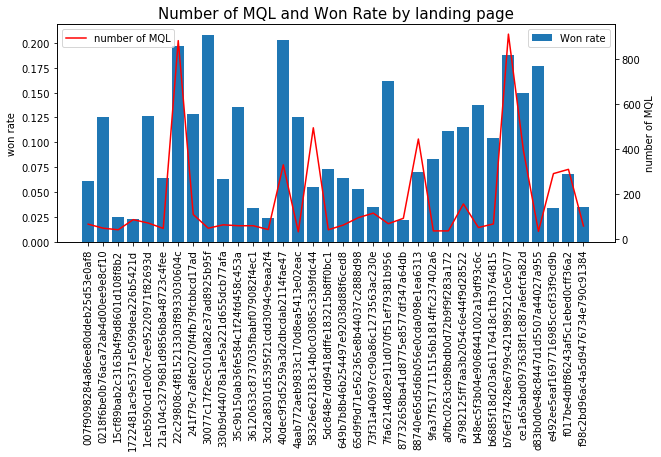

In [0]:
# Landing Page number of MQL and Won rate
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(landing_page_2, percentage_lp, label = "Won rate")
ax2.plot(landing_page_2, Num_mql, color = "red", label = "number of MQL")
ax.set_ylabel('won rate')
ax.legend()
ax2.set_ylabel('number of MQL')
ax2.legend()
plt.title("Number of MQL and Won Rate by landing page", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## Time to close a deal 

In [0]:
data2 = pd.merge(mql, close, how = "right", on = "mql_id")

#Turn string into datetime data
data2['first_contact_date'] = pd.to_datetime(data2['first_contact_date'])
data2['won_date'] = pd.to_datetime(data2['won_date'])

#Sales cycle calculation
data2['sales cycle'] = data2['won_date'] - data2['first_contact_date']
data2['sales cycle'] = data2['sales cycle'].dt.days

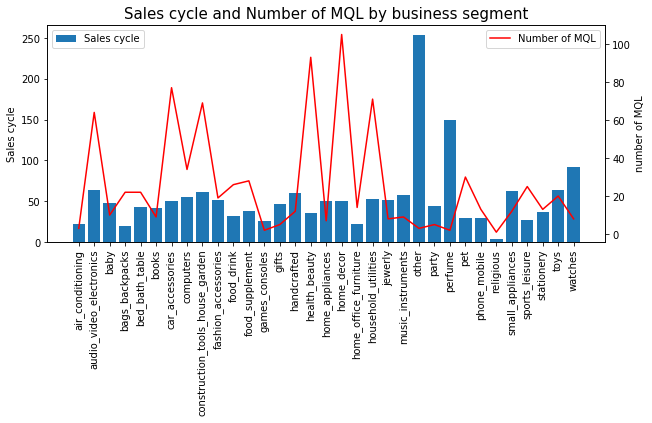

In [0]:
#sales cycle by Business Segment 
segment_time = data2.groupby(['business_segment']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(segment_time.index, segment_time['sales cycle'], label = "Sales cycle")
ax2.plot(segment_time.index, segment_time['mql_id'], color = "red", label = "Number of MQL")
ax.set_ylabel('Sales cycle')
ax.legend(loc = "upper left")
plt.title("Sales cycle and Number of MQL by business segment", size =15)
ax2.legend(loc = "upper right")
ax2.set_ylabel('number of MQL')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

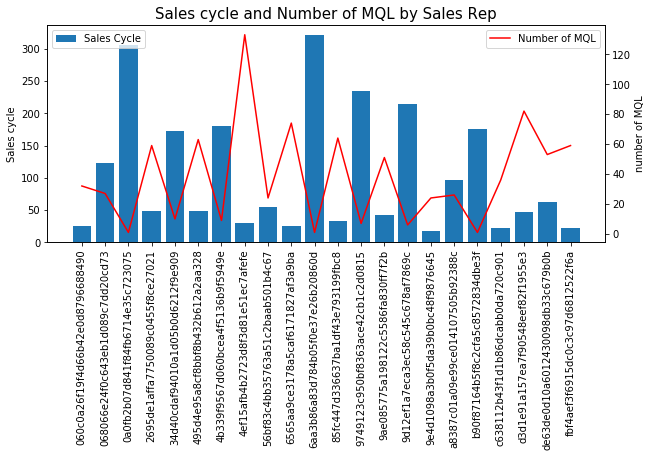

In [0]:
#Sales cycle by sale reps
sr_time = data2.groupby(['sr_id']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(sr_time.index, sr_time['sales cycle'], label = "Sales Cycle")
ax2.plot(sr_time.index, sr_time['mql_id'], color = "red", label = "Number of MQL")
ax.set_ylabel('Sales cycle')
ax2.set_ylabel('number of MQL')
ax.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.title("Sales cycle and Number of MQL by Sales Rep", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

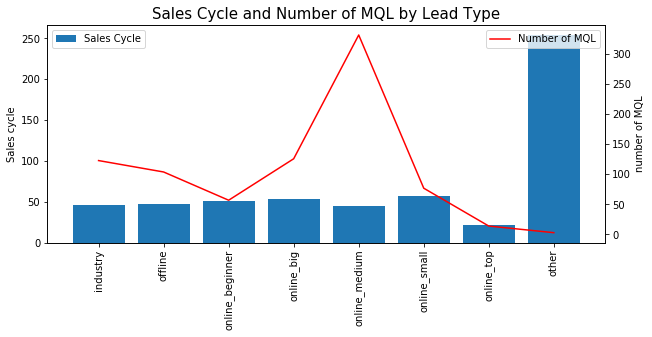

In [0]:
#Sales cycle by lead type
lead_time = data2.groupby(['lead_type']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(lead_time.index, lead_time['sales cycle'], label = "Sales Cycle")
ax2.plot(lead_time.index, lead_time['mql_id'], color = "red", label = "Number of MQL")
ax.set_ylabel('Sales cycle')
ax2.set_ylabel('number of MQL')
ax.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.title("Sales Cycle and Number of MQL by Lead Type", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## Lead Behavior Profiles & business Type

Text(0.5, 1.0, 'Heatmap of Lead Behaviour Profile and Business Segment')

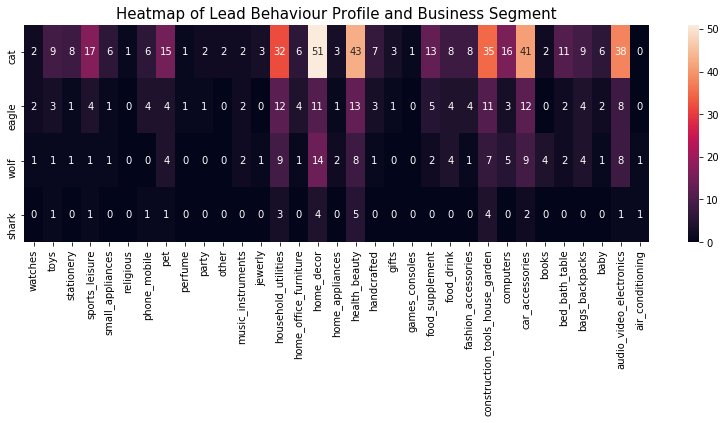

In [0]:
#The number of MQL by lead behaviour profile and buisness segment
segment = pd.DataFrame(index = ['cat','eagle', 'wolf', 'shark'])
for i in segment_time.index:
    lead_profile = close[close['business_segment'] == i]
    segment = lead_profile.groupby('lead_behaviour_profile').agg({'mql_id':"count"}).rename(columns = {'mql_id':i}).merge(segment, 
                                                                                                how = "right", left_index = True, right_index = True)
    
segment = segment.fillna(0)
plt.figure(figsize = (14,4))
snb.heatmap(segment, annot = True)
plt.title("Heatmap of Lead Behaviour Profile and Business Segment", size = 15)    

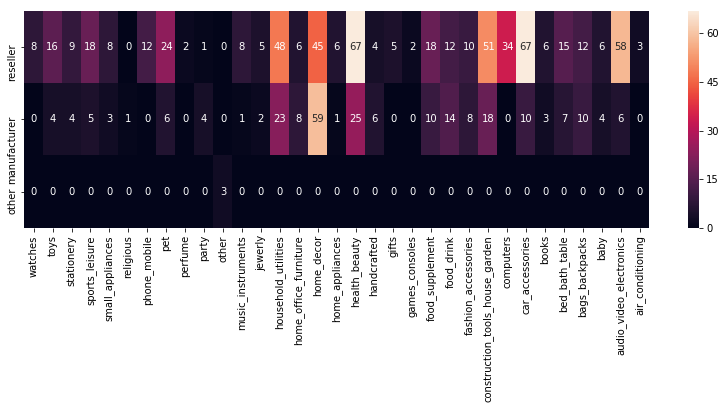

In [0]:
#Number of MQL by lead type and business segments
segment2 = pd.DataFrame(index = ['reseller', 'manufacturer', 'other'])
for i in segment_time.index:
    lead_profile = close[close['business_segment'] == i]
    segment2 = lead_profile.groupby('business_type').agg({'mql_id':"count"}).rename(columns = {'mql_id':i}).merge(segment2, how = "right", left_index = True, right_index = True)
segment2 = segment2.fillna(0)
plt.figure(figsize = (14,4))
snb.heatmap(segment2, annot = True)
plt.savefig("segment_business_type.png")

### Closed Deal Performance


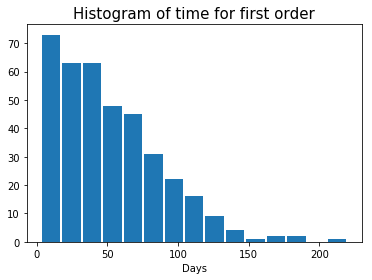

In [0]:
#Time a seller waits for first order
seller = pd.merge(order_item, orders[['order_id','order_approved_at']], how = "left", left_on = "order_id",right_on = "order_id")
seller['order_approved_at'] = pd.to_datetime(seller['order_approved_at'])

seller_first_order = seller.groupby('seller_id').agg({"order_approved_at":"min"})
diff = pd.merge(close, seller_first_order, how = "inner", left_on = "seller_id", right_index = True)
diff['first_order_time'] = diff['order_approved_at'] - pd.to_datetime(diff['won_date'])
diff['first_order_time'] = diff["first_order_time"].dt.days

#Histogram
plt.figure()
plt.hist(diff["first_order_time"], bins = 15, rwidth = 0.9)
plt.title("Histogram of time for first order",size = 15)
plt.xlabel("Days")
plt.show()

Text(0.5, 1.0, 'First order time by segments')

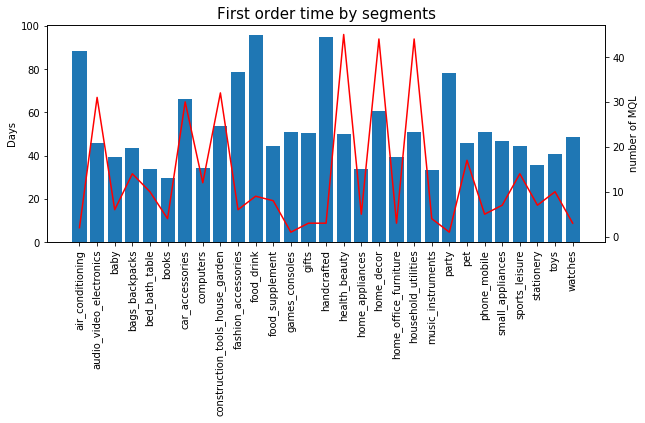

In [0]:
#Which segment wait the longest time for the first order
first_order_segment = diff.groupby("business_segment").agg({"first_order_time":"mean", "mql_id":"count"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(first_order_segment.index, first_order_segment['first_order_time'])
ax2.plot(first_order_segment.index, first_order_segment['mql_id'], color = "red")
ax.set_ylabel('Days')
ax2.set_ylabel('number of MQL')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.title("First order time by segments", size = 15)

In [0]:
#Top business segments by sales
product = pd.merge(product[["product_id", "product_category_name"]], category, how = "left", left_on = "product_category_name", 
                   right_on = "product_category_name")

product_by_value = pd.merge(seller, product, how = "left", left_on = "product_id", right_on = "product_id")

category_sales = product_by_value.groupby("product_category_name_english").agg({"price":"sum"})
category_sales = category_sales.sort_values(by = ["price"], ascending = False)
top10 = category_sales.iloc[:10]
top10_category = top10.index



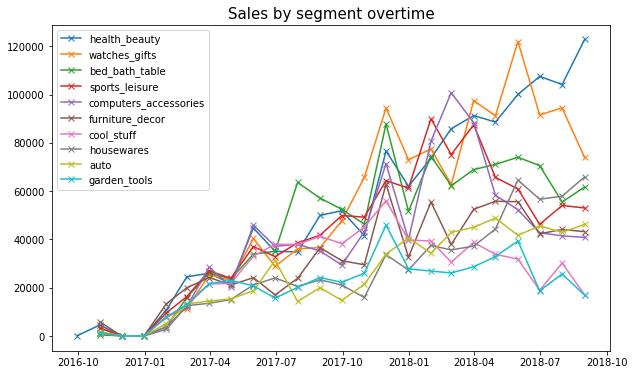

In [0]:
plt.figure(figsize = (10,6))
fancy_plot_2 = plt.subplot()
for i in top10_category:
    order_category = product_by_value[product_by_value['product_category_name_english'] == i]
    order_category = order_category.set_index(pd.to_datetime(order_category['order_approved_at']))
    order_category_agg = order_category.groupby(pd.Grouper(freq = "M")).agg({"price":"sum"})
    fancy_plot_2.plot(order_category_agg.index, order_category_agg,'-x', label = i)
fancy_plot_2.legend()
plt.title("Sales by segment overtime", size =15)
plt.savefig("Sales by product category.png") 